# Customer Experence Analysis based on Shipping Dataset
### Data Analytics Project (Python, Power BI)
Aaron Xie

___
# Table of Content
* [The Problem](#problem)
    * [The Qestions](#question)
    * [The Goal](#goal)
* [Data Preparation](#preparation)
* [Data Processing](#processing)
    * [Dataset Basic Info](#info)
* [Data Analysis](#analysis)
    * [Understanding Variables](#variable)
        * [Categorical Variables](#categorical)
        * [Numeric Variables](#numeric)
    * [Understanding Relationships](#relationship)
        * [Target and Numeric](#target-numeric)
        * [Target and Categorical](#target-categorical)
* [Data Sharing](#sharing)
    * [Dashboard 1](#dashboard1)
    * [Dashboard 2](#dashboard2)
* [Action Suggestions](#act)
___

<a id="problem"></a>
# The Problem
Customer rating is a crucial metric to show how satisfied customers are with a business. Therefore, this project examinates the relationship between customer rating and the shipping features. What are the potential drawbacks of low customer ratings?

<a id="question"></a>
### The Questions
Shipping performance:
* What are the total cost and shipping amount?
* Which block/department has the highest shipping amount?
* What is the most preferred ship mode?
* Are the products gender neutral?
* How much does the products usually cost?
* How does the business offer discount based on cost?

Customer experience:
* What are the average customer ratings?
* Which customer feature is related to customer ratings?
* Does the on time rate matter to customer ratings?
* Can increasing discount offered raise customer ratings?
* How many customers care calls does the business usually receive?
* Does more care call mean bad experience(bad ratings)?
* Does high prior purchases mean good experience(good ratings)?

<a id="goal"></a>
### The Goal
* Find the drawbacks that the business can improve to increase customer ratings.
* Make strategies to overcome these drawbacks and raise the customer ratings by 20%

<a id="preparation"></a>
# Data Collection/Preparation
This project uses a fictional dataset from Kaggle; check out the website to see its documentation.
https://www.kaggle.com/datasets/prachi13/customer-analytics

<a id="processing"></a>
# Data Processing/Cleaning

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import scipy

plt.style.use("ggplot")
rcParams['figure.figsize'] = (12,  6)

In [2]:
# import the dataset
shipping_df = pd.read_csv(r"C:\Users\zong0\OneDrive\Documents\Data_Science\My_Projects\Shipping EDA\e_commerce_shipping.csv")

<a id="info"></a>
### Dataset Basic Info

In [3]:
shipping_df.head()

ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0   1               D           Flight                    4                2   
1   2               F           Flight                    4                5   
2   3               A           Flight                    2                2   
3   4               B           Flight                    3                3   
4   5               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0                44           1233                    1  
1                59           3088                    1  
2                48           3374                    1  
3                10           1177                    1  
4                46           2484                    1

In [4]:
shipping_df.shape

(10999, 12)

In [5]:
shipping_df.describe()

ID  Customer_care_calls  Customer_rating  Cost_of_the_Product  \
count  10999.00000         10999.000000     10999.000000         10999.000000   
mean    5500.00000             4.054459         2.990545           210.196836   
std     3175.28214             1.141490         1.413603            48.063272   
min        1.00000             2.000000         1.000000            96.000000   
25%     2750.50000             3.000000         2.000000           169.000000   
50%     5500.00000             4.000000         3.000000           214.000000   
75%     8249.50000             5.000000         4.000000           251.000000   
max    10999.00000             7.000000         5.000000           310.000000   

       Prior_purchases  Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
count     10999.000000      10999.000000   10999.000000         10999.000000  
mean          3.567597         13.373216    3634.016729             0.596691  
std           1.522860         16.205527    1635.377251             0.490584  
min           2.000000          1.000000    1001.000000             0.000000  
25%           3.000000          4.000000    1839.500000             0.000000  
50%           3.000000          7.000000    4149.000000             1.000000  
75%           4.000000         10.000000    5050.000000             1.000000  
max          10.000000         65.000000    7846.000000             1.000000

In [6]:
shipping_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [7]:
# check duplicate rows
shipping_df.duplicated().sum()

0

Great! The dataset does not have missing values or duplicated rows

In [8]:
# ID is just primary key, set it to index
shipping_df = shipping_df.set_index('ID')

<a id="analysis"></a>
# Data Analysis

<a id="variable"></a>
### Understanding Variables

<a id="categorical"></a>
### Categorical Variables

Attention: the column 'Reached.on.Time_Y.N' is categorial variable, although it has int64 Dtype. So is the target column 'Customer_rating,' because it is ordinal

In [9]:
# create a list of categorical variable
categorical_variables = ['Reached.on.Time_Y.N','Customer_rating']
for col in list(shipping_df.columns):
    if shipping_df[col].dtypes == object: 
        categorical_variables += [col] 
categorical_variables

['Reached.on.Time_Y.N',
 'Customer_rating',
 'Warehouse_block',
 'Mode_of_Shipment',
 'Product_importance',
 'Gender']

In [10]:
# Check the percentage of all categories for all categorical variables
for col in categorical_variables:
    print(shipping_df[col].value_counts(normalize = True))

1    0.596691
0    0.403309
Name: Reached.on.Time_Y.N, dtype: float64
3    0.203564
1    0.203200
4    0.199018
5    0.197382
2    0.196836
Name: Customer_rating, dtype: float64
F    0.333303
D    0.166742
A    0.166652
B    0.166652
C    0.166652
Name: Warehouse_block, dtype: float64
Ship      0.678425
Flight    0.161560
Road      0.160015
Name: Mode_of_Shipment, dtype: float64
low       0.481589
medium    0.432221
high      0.086190
Name: Product_importance, dtype: float64
F    0.504137
M    0.495863
Name: Gender, dtype: float64


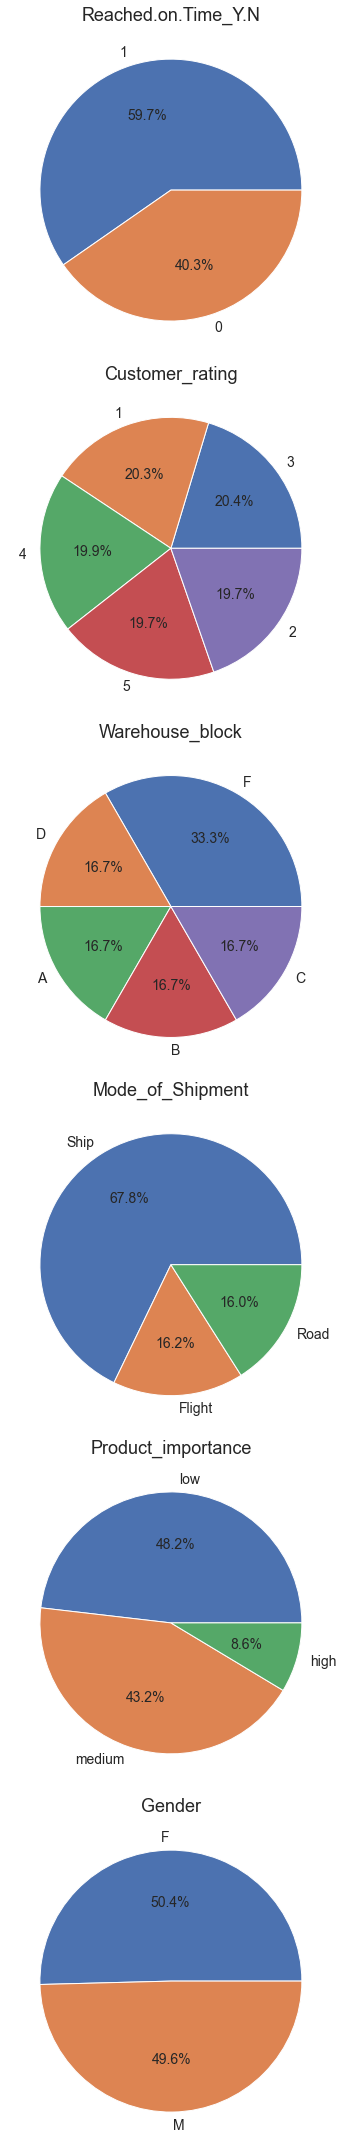

In [11]:
# Visualize the previous percentage (optional)

sns.set(font_scale=1.5)
fig, ax = plt.subplots(6, figsize=(30, 30))
for elem, i in zip(categorical_variables, range(6)):
        shipping_df[elem].value_counts().plot(kind='pie', ax=ax[i], autopct='%1.1f%%', title = elem, ylabel='',textprops={'fontsize': 14})
fig.tight_layout()
plt.show()

**The analysis on categorical variables indicates:**
* The on time rate of the business is only 59.7%, which is relatively low; the business needs to improve shipping speed.
* Warehouse Section F ships most of the products; the business needs to examinate whether they have enough labors in this section.
* Most products are shipped by ship; this may be the reason for delay.
* The products of the company is gender neutral. 
* Customer Rating is nearly uniformly distributed, which is unusual. The business may have equal good and bad features. 

Note: these speculations are based on this dataset; **if this dataset is just a sample dataset**, the project needs to add more tests to see whether this sample dataset can represent the population dataset.

<a id="numeric"></a>
### Numeric Variables

In [12]:
numeric_variables = []
for col in list(shipping_df.columns):
    if shipping_df[col].dtypes == np.int64: # note: don't just write 'int64'
        numeric_variables += [col] 
numeric_variables.remove('Reached.on.Time_Y.N')
numeric_variables.remove('Customer_rating')
numeric_variables

['Customer_care_calls',
 'Cost_of_the_Product',
 'Prior_purchases',
 'Discount_offered',
 'Weight_in_gms']

In [13]:
# Describe the distributions
for elem in numeric_variables:
    print(shipping_df[elem].describe())

count    10999.000000
mean         4.054459
std          1.141490
min          2.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          7.000000
Name: Customer_care_calls, dtype: float64
count    10999.000000
mean       210.196836
std         48.063272
min         96.000000
25%        169.000000
50%        214.000000
75%        251.000000
max        310.000000
Name: Cost_of_the_Product, dtype: float64
count    10999.000000
mean         3.567597
std          1.522860
min          2.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: Prior_purchases, dtype: float64
count    10999.000000
mean        13.373216
std         16.205527
min          1.000000
25%          4.000000
50%          7.000000
75%         10.000000
max         65.000000
Name: Discount_offered, dtype: float64
count    10999.000000
mean      3634.016729
std       1635.377251
min       1001.000000
25%       1839.500000
50%       4149.000000
75%

In [14]:
# Check skewness and kurtosis
for elem in numeric_variables:
    print(f"{elem} Skewness: {shipping_df[elem].skew()}")
    print(f"{elem} Kurtosis: {shipping_df[elem].kurt()}")

Customer_care_calls Skewness: 0.3919257752012462
Customer_care_calls Kurtosis: -0.3089949555233926
Cost_of_the_Product Skewness: -0.15711711926913643
Cost_of_the_Product Kurtosis: -0.9721602891279231
Prior_purchases Skewness: 1.6818973153494547
Prior_purchases Kurtosis: 4.006342295841063
Discount_offered Skewness: 1.7989291087435189
Discount_offered Kurtosis: 2.0005855546662437
Weight_in_gms Skewness: -0.2497467569788316
Weight_in_gms Kurtosis: -1.4476706240690815


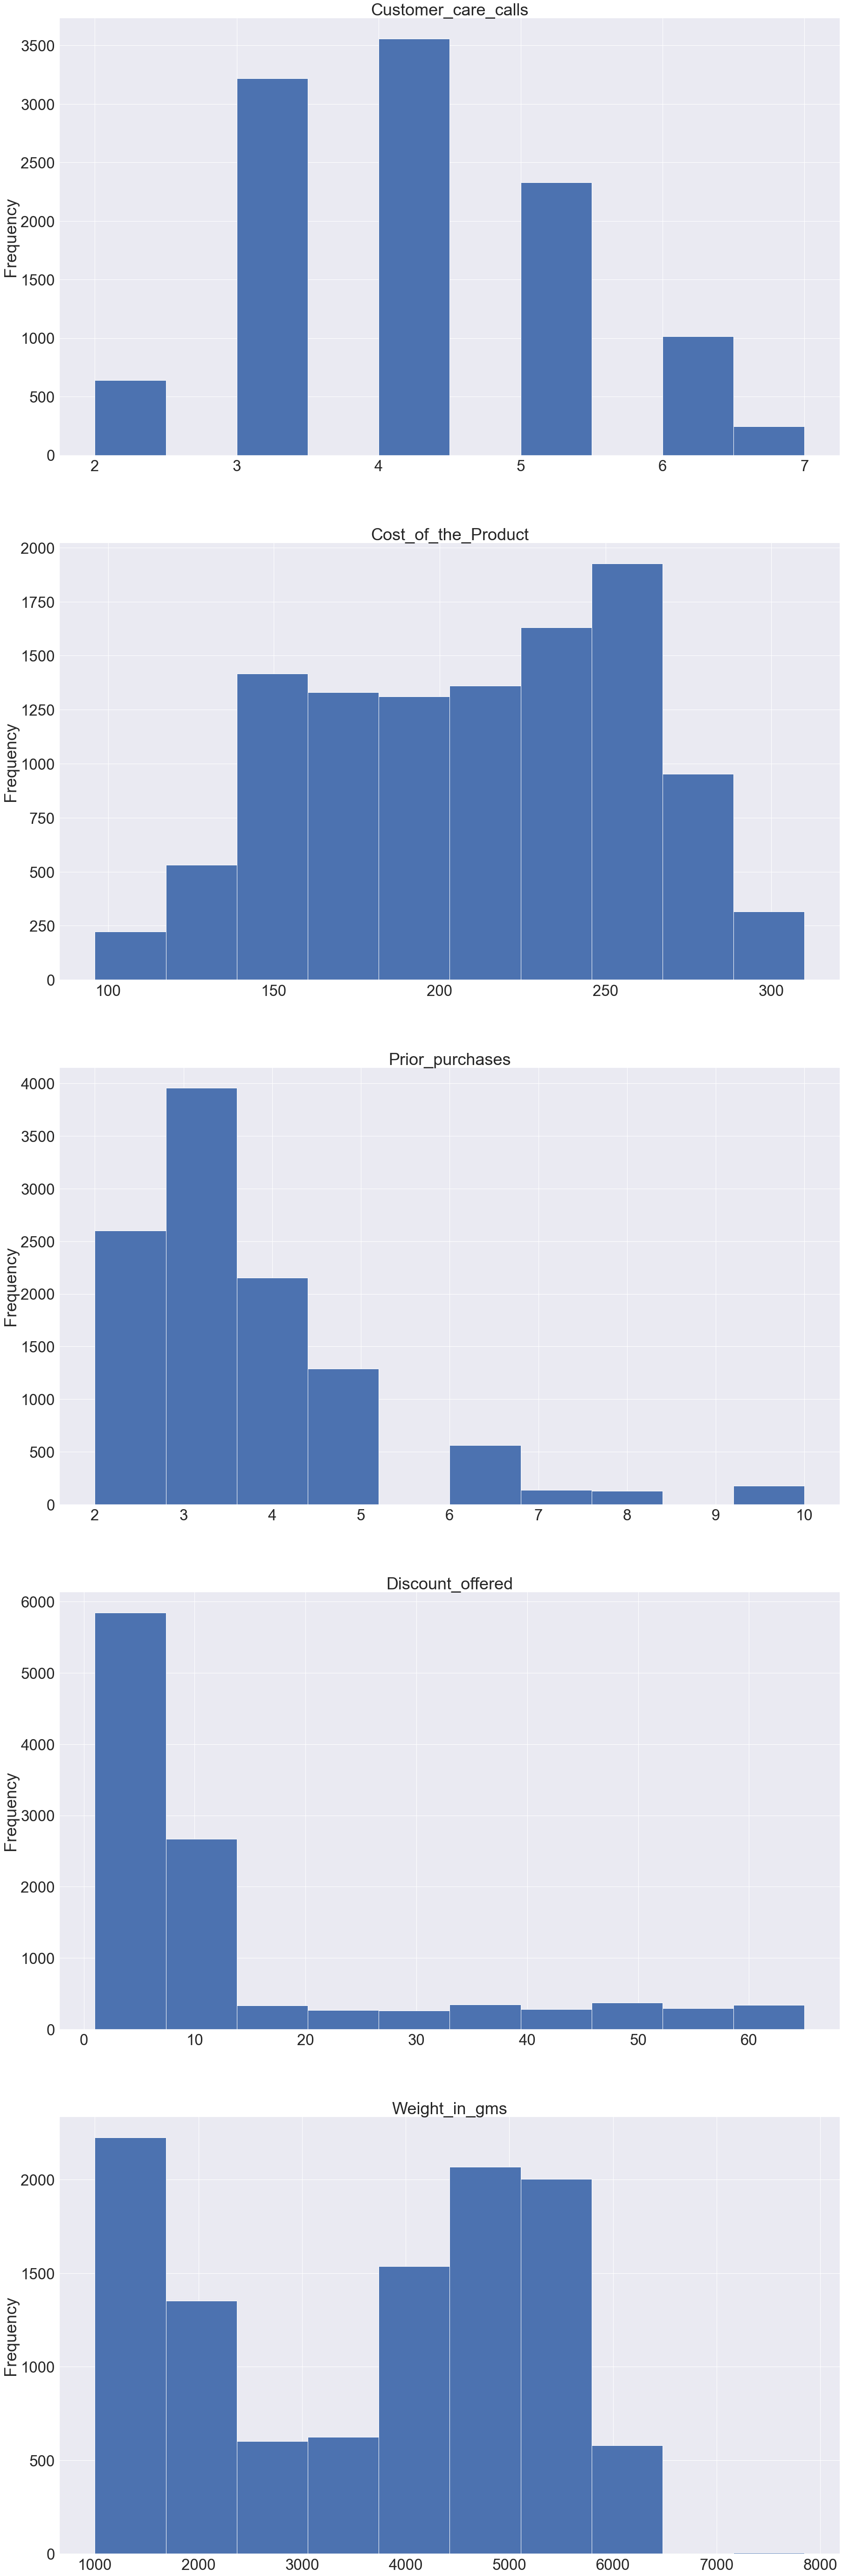

In [15]:
# Plot the histgram of numeric variables
sns.set(font_scale=3)
fig, ax = plt.subplots(5, figsize=(30, 100))
for elem, i in zip(numeric_variables, range(5)):
    shipping_df[elem].plot(kind='hist', ax=ax[i], title = elem)


**The analysis on categorical variables indicates:**
* The average customer care call is 4 times, which is frequent. This phenomenon indicates following possible problems: customer care provided has low quality and does not solve customers' problems; the business' system does not function well to fulfill all customers' needs; this is a business with high customization, yet the business has not built those customization into its website/app.
* The prior_purchases is right skewed. It is more likely for those who have bought the products for 2 to 4 times to buy again. After that, they will cease to need these products. The products are not necessity; the business needs to diversify its products.
* Mostly the company only has small discounts; it can consider increase the discount amount to attract more businesses.

<a id="relationship"></a>
### Understanding the Relationships between Variables

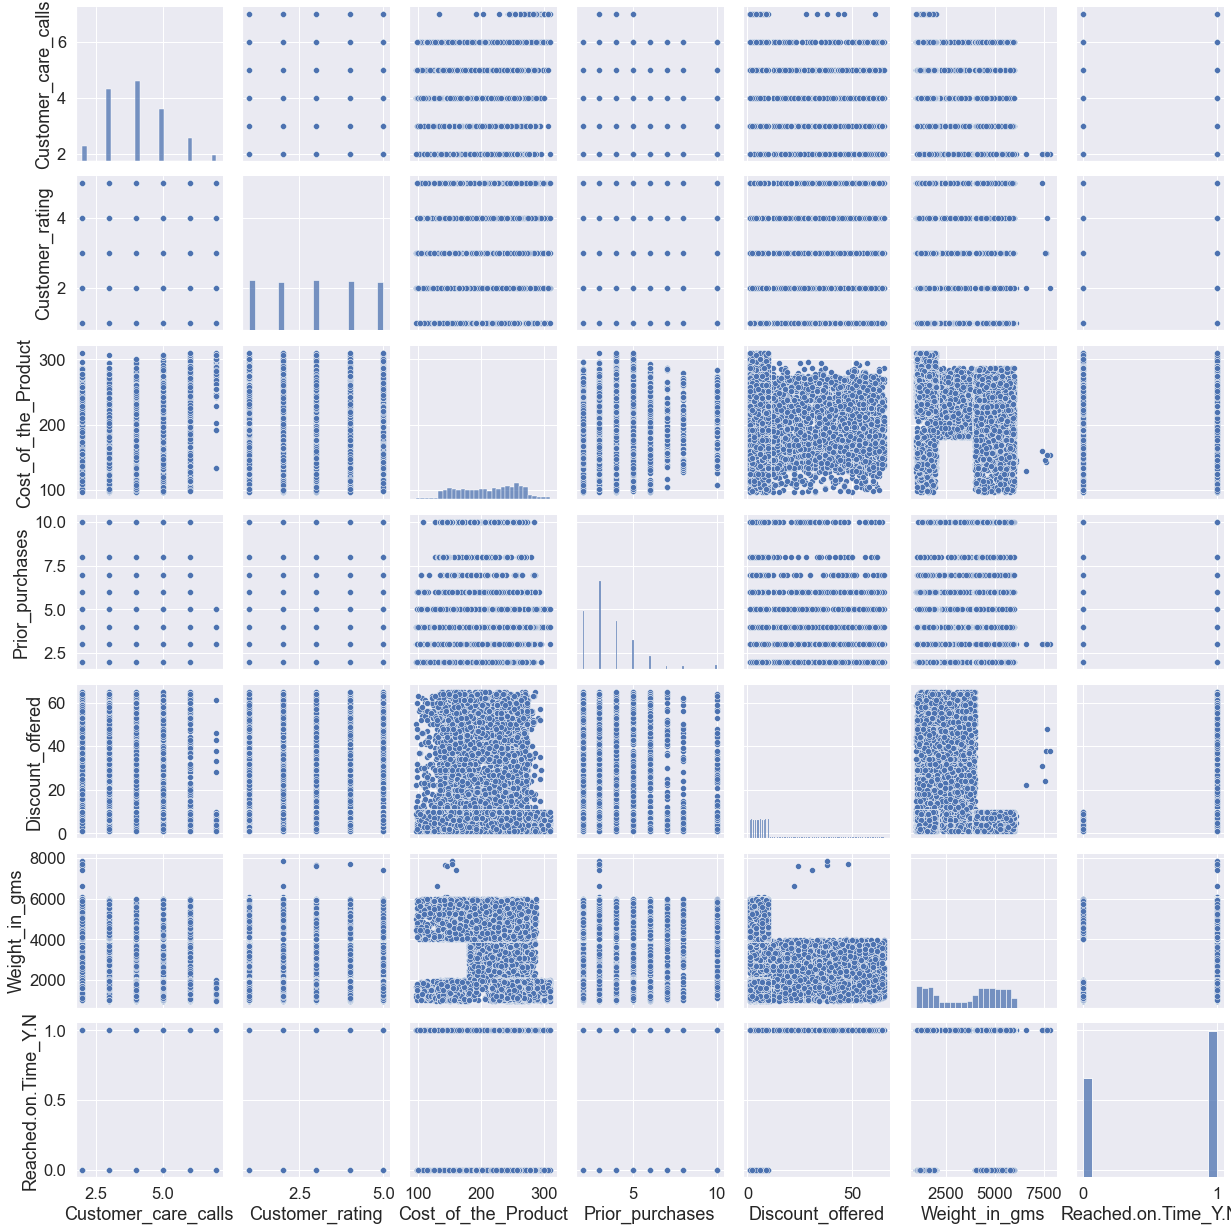

In [16]:
# Skim the relationships with a scatterplot
sns.set(font_scale=1.5)
sns.pairplot(shipping_df);

Some insights from scatterplots:
* The products with high weights (>4000gms) only have lower discount offered
* The products with medium weights (between 2000 and 4000gms) always cost higher (at least 180)
* As for target 'Customer_rating,' it appears to have no relationship with other variables. Need further investigation.
* The business offers more small discounts; they offers more discounts on products with medium costs.

<a id="target-numeric"></a>
### Understanding relationship between 'Customer_rating' and all numeric variables

Using **spearman correlation** because 'Customer_rating' is ordinal variable.

In [17]:
# Examinate the spearman correlation and p-values between all variables and customer_rating
for col in numeric_variables:
        if col != 'Customer_rating':
            corr, p_value = scipy.stats.spearmanr(shipping_df[col], shipping_df['Customer_rating'])
            print(f'{col} correlation: {round(corr,3)}; p_value: {round(p_value,3)}')


Customer_care_calls correlation: 0.012; p_value: 0.214
Cost_of_the_Product correlation: 0.01; p_value: 0.283
Prior_purchases correlation: 0.011; p_value: 0.269
Discount_offered correlation: -0.002; p_value: 0.81
Weight_in_gms correlation: -0.005; p_value: 0.615


Given that none of these p-values is less than 0.05, the correlation values are not considered statistically significant; even if they are significant, the correlation values are too close to 0, which represents very weak correlation between the rank of two variables.

Using **boxplots**

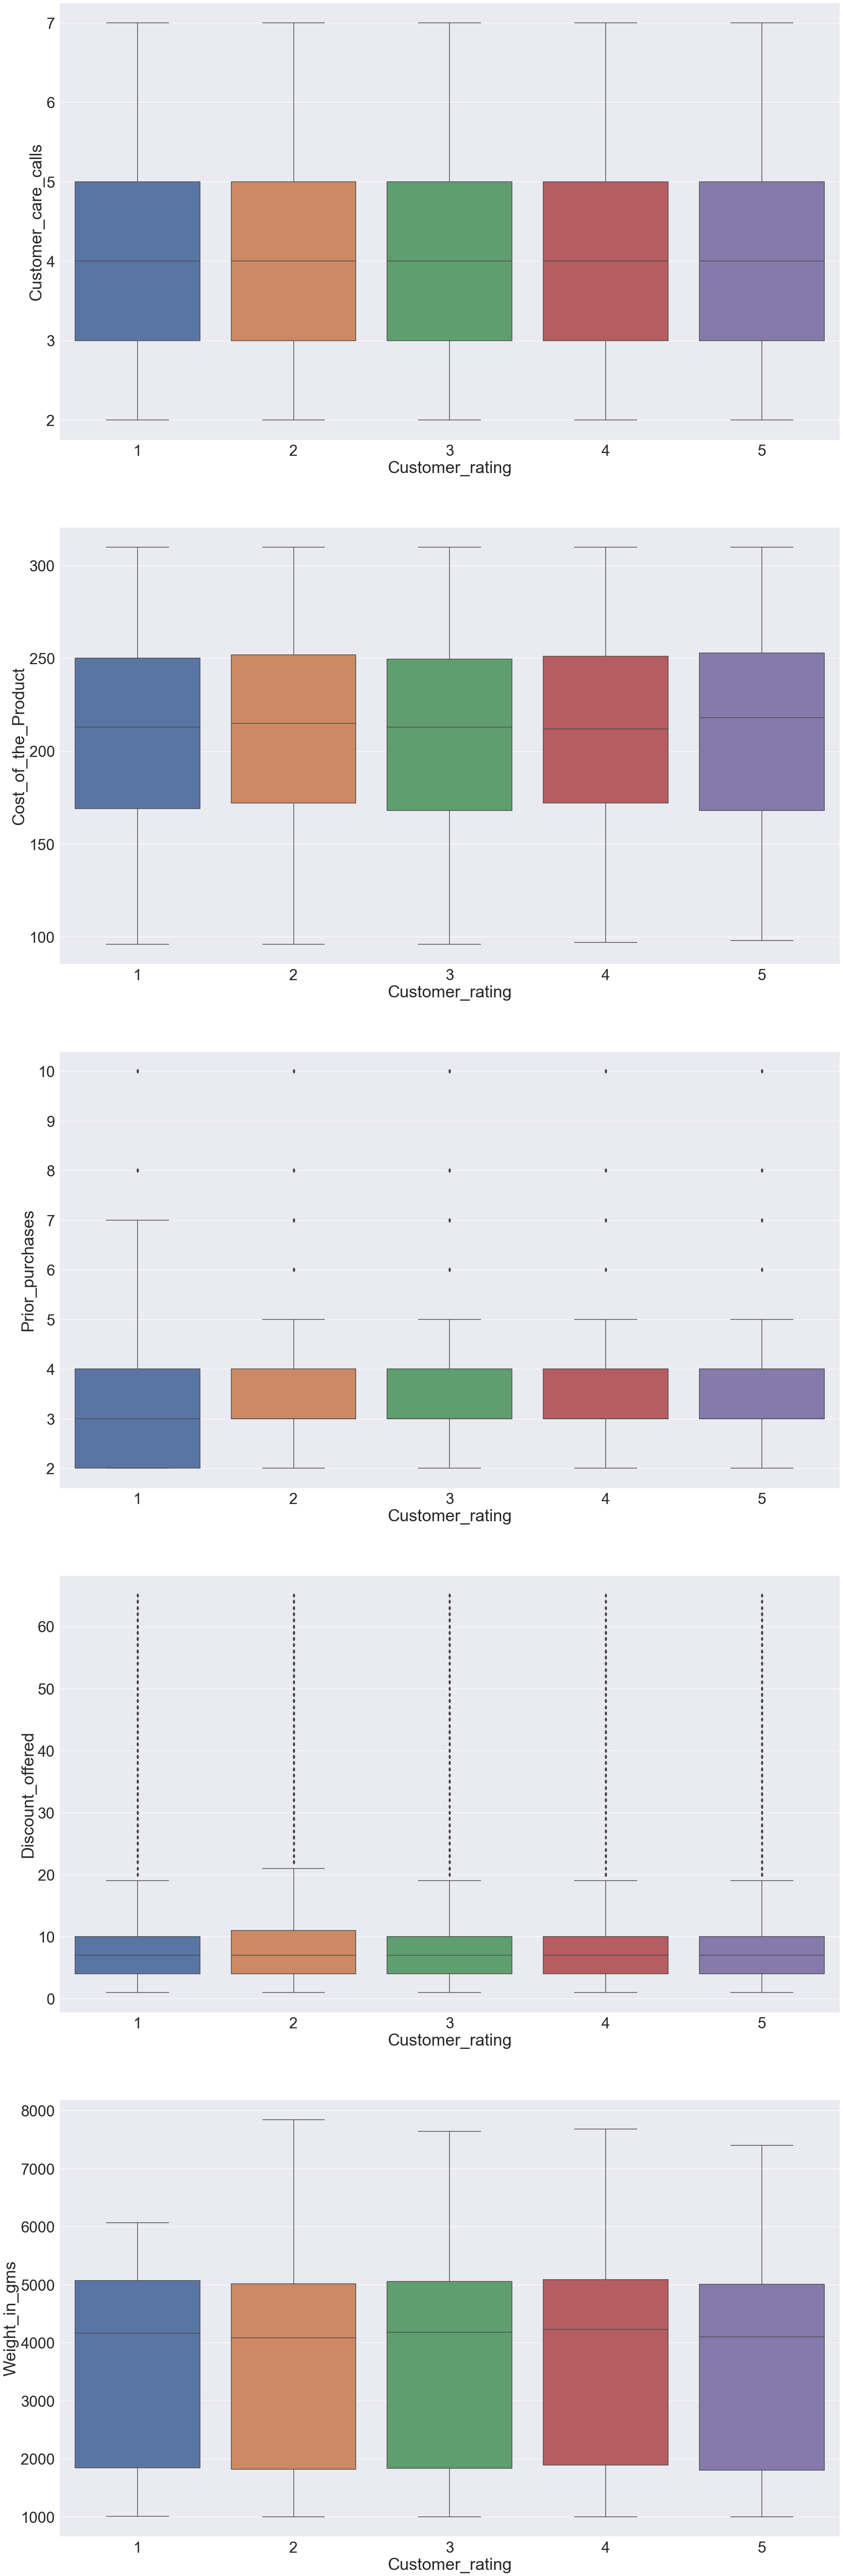

In [18]:
sns.set(font_scale=3)
fig, ax = plt.subplots(len(numeric_variables), figsize=(30, 100))

for col, i in zip(numeric_variables, range(len(numeric_variables))):
        sns.boxplot(x="Customer_rating", y= col, ax=ax[i], data=shipping_df)
#plt.show()

Unfortunately, the box plots within the same subplot appear to be very similar, which indicates weak association between these numeric variables and the target categorical variable Customer_rating

<a id="target-categorical"></a>
### Understanding relationship between 'Customer_rating' and other categorical variables

Use Contingency Table, Chi-Square Test, and Cramer's V
* Reference: https://stackoverflow.com/questions/46498455/categorical-features-correlation/46498792#46498792

In [19]:
def two_categorical(col1, col2):
    contingency_table = pd.crosstab(col1, col2)
    matrix = contingency_table.values
    chi2, pval= scipy.stats.chi2_contingency(matrix)[0:2]
    size = matrix.sum()
    phi2 = chi2/size
    row, col = matrix.shape
    phi2corr = max(0, phi2 - (col-1)*(row-1)/(size-1))
    rowcorr = row - (row - 1)**2/(size - 1)
    colcorr = col - (col - 1)**2/(size - 1)
    cramers_v = np.sqrt(phi2corr/min((colcorr - 1),(rowcorr - 1)))
    print(contingency_table)
    print(f'Chi-square: {round(chi2, 3)}, P-Value: {round(pval, 3)}, Cramer\'s V: {cramers_v}')

In [20]:
for col in categorical_variables:
    if col != 'Customer_rating':
        print(two_categorical(shipping_df['Customer_rating'], shipping_df[col]))

Reached.on.Time_Y.N    0     1
Customer_rating               
1                    922  1313
2                    892  1273
3                    882  1357
4                    886  1303
5                    854  1317
Chi-square: 3.2, P-Value: 0.525, Cramer's V: 0.0
None
Warehouse_block    A    B    C    D    F
Customer_rating                         
1                394  371  364  364  742
2                376  376  362  340  711
3                345  371  383  390  750
4                350  348  369  379  743
5                368  367  355  361  720
Chi-square: 10.01, P-Value: 0.866, Cramer's V: 0.0
None
Mode_of_Shipment  Flight  Road  Ship
Customer_rating                     
1                    369   361  1505
2                    362   347  1456
3                    330   343  1566
4                    363   357  1469
5                    353   352  1466
Chi-square: 6.376, P-Value: 0.605, Cramer's V: 0.0
None
Product_importance  high   low  medium
Customer_rating                 

Huge p-value and 0 cramer's V entail that there is no association between 'Customer_rating' and other categorical variables. It is questionalbe that whether this fictional dataset was poorly constructed or just incomplete. There must be other reasons for the business to have a low rating. 

Given that this dataset did not correspond to my expection, I choose to combine the analysis with my experience in the field to emphasize following variables in my report:
* 'Reached.on.Time_Y.N' 
* 'Customer_care_calls': having more calls means customer service cannot solve customers' problems efficiently
* 'Prior_purchases': repeated purchases indicate that customer approves the products or services of the business
* 'Discount_offered': A discount is always favorable

<a id="sharing"></a>
# Data Sharing

Sharing data by using 2 Power BI Dashboards.

<a id="dashboard1"></a>
### Dashboard 1: Overall Shipping Performance

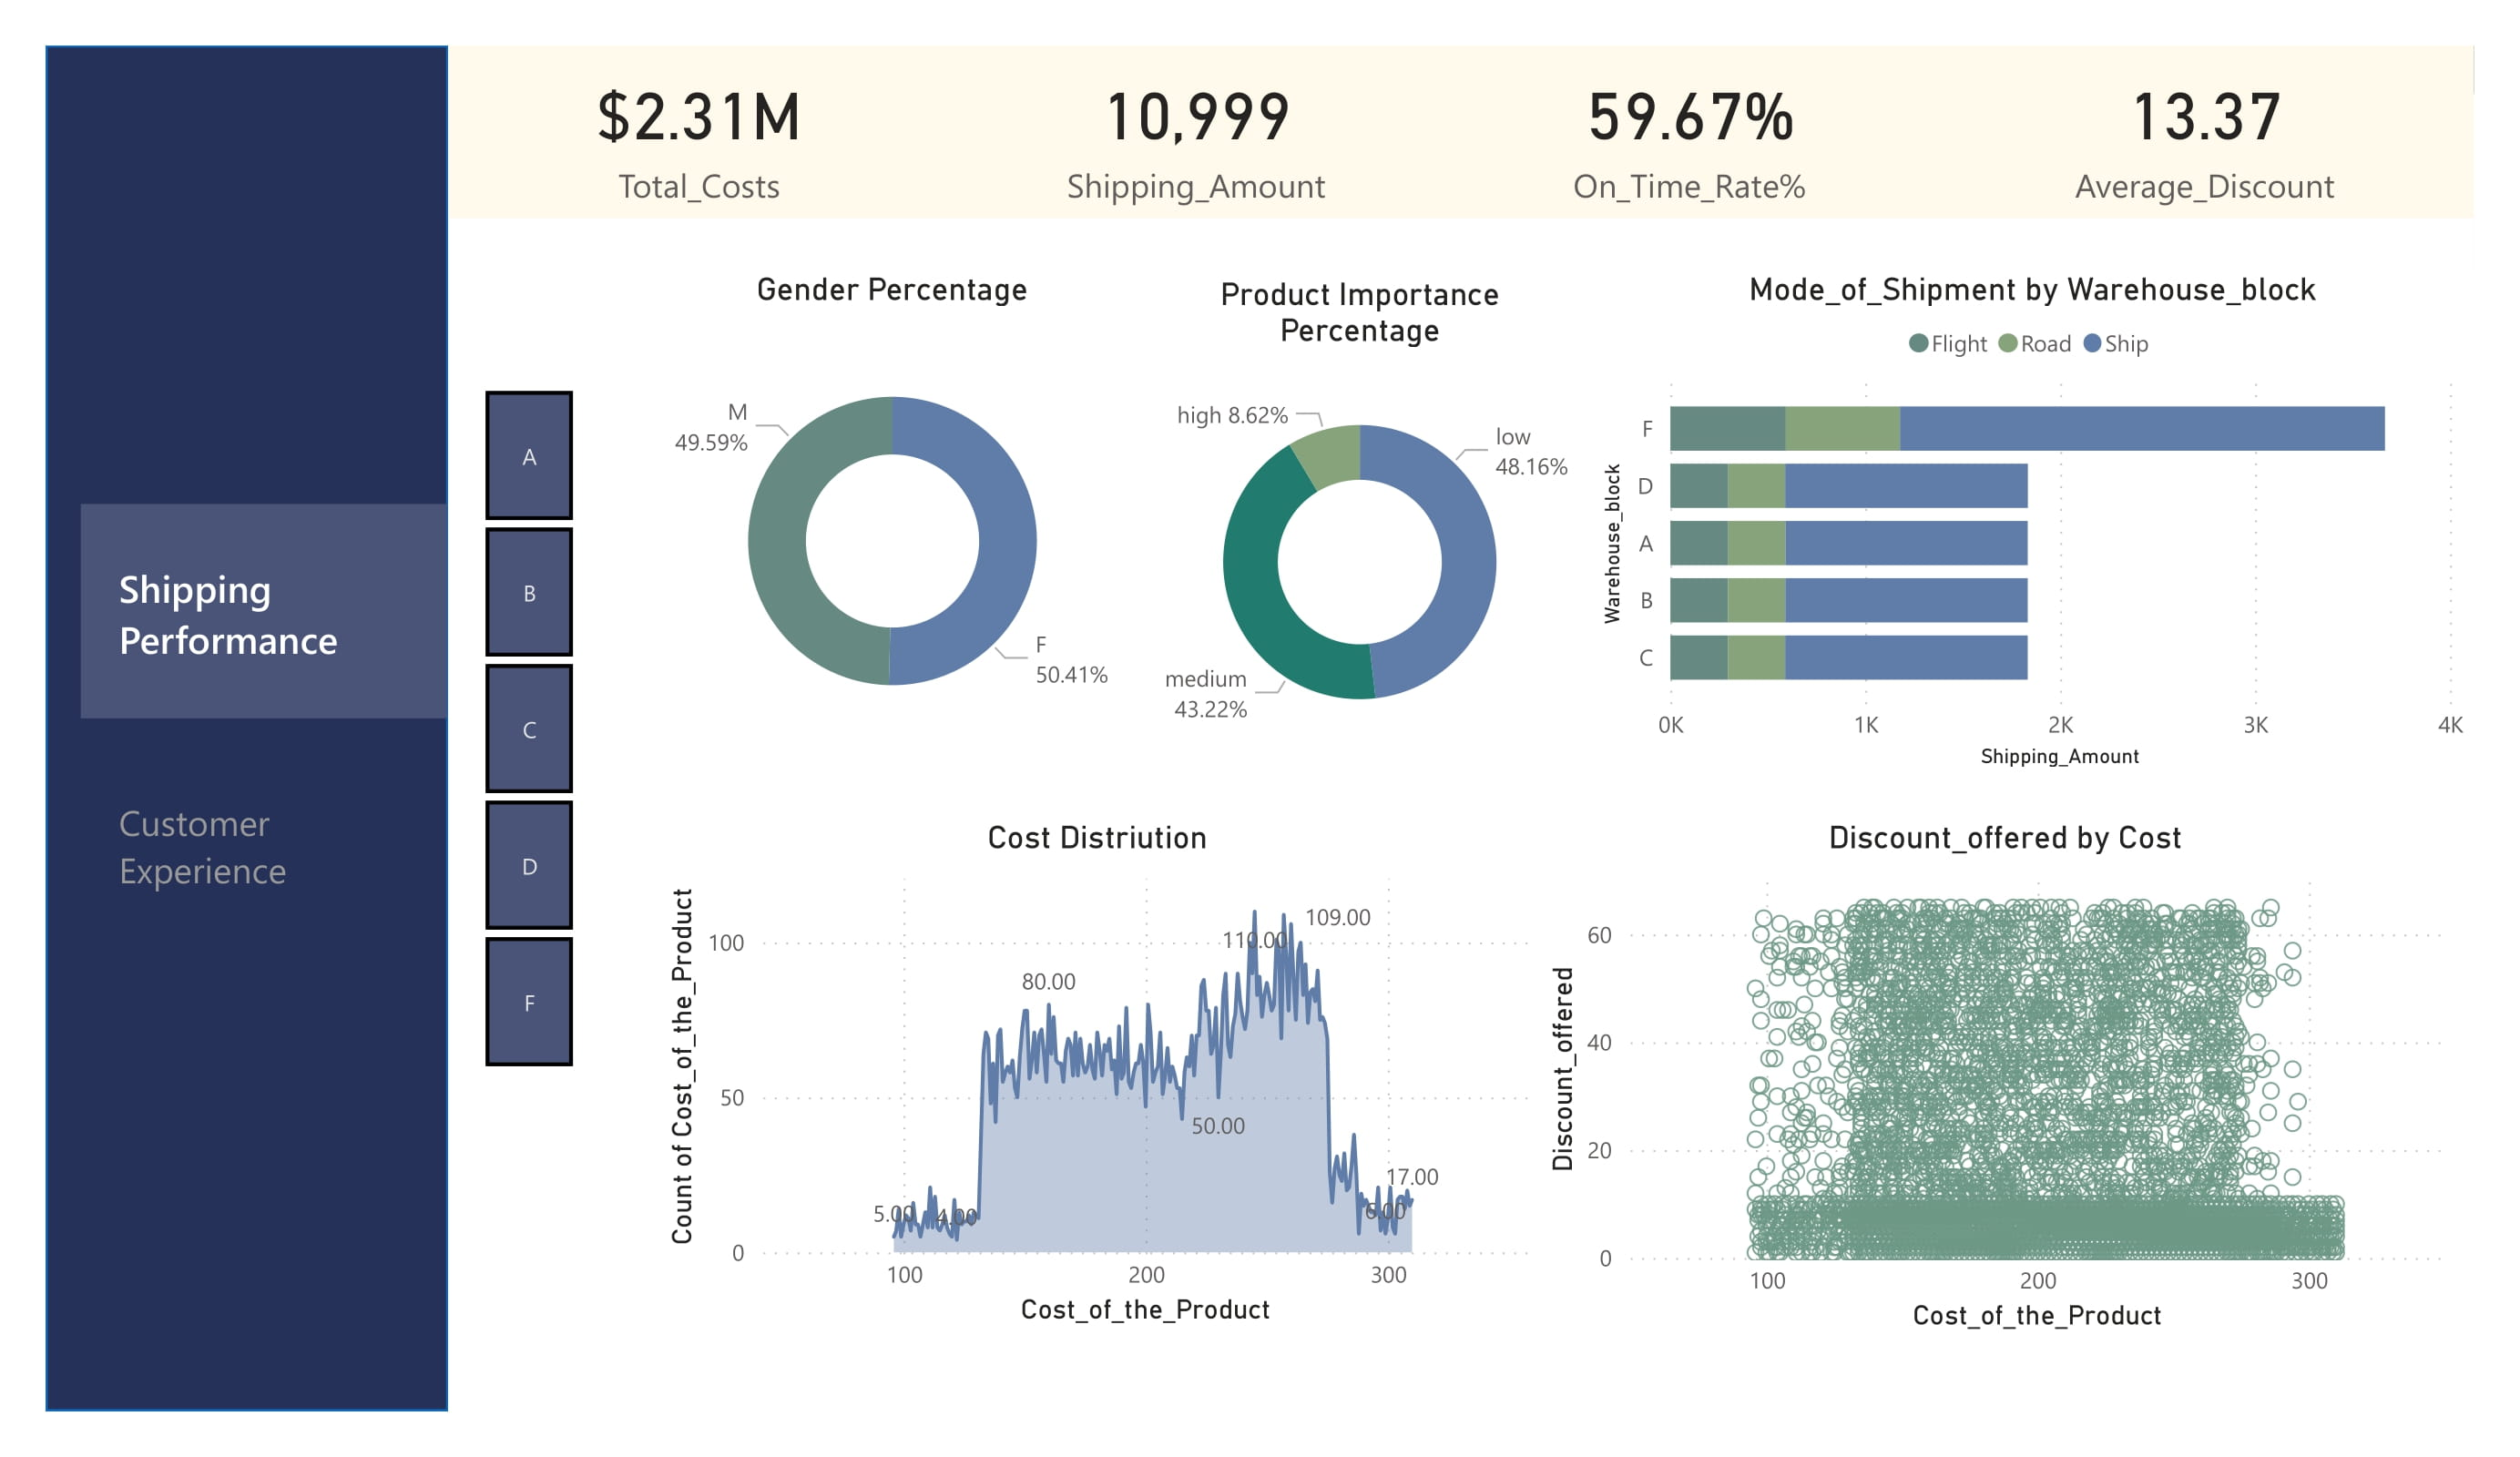

Answering the questions:
- What are the total cost and shipping amount? 
    - $2.31M and 10,999
- Which block/department has the highest shipping amount? 
    - F
- What is the most preferred ship mode? 
    - Ship
- Are the products gender neutral? 
    - Yes
- How much does the products usually cost? 
    - Mostly they cost from around 130 to around 270.
- How does the business offer discount based on cost? 
    - The business offers more small discounts; they offers more discounts on products with medium costs (from around 130 to around 270).

Note: by clicking the cube slicers to the left, we can answer these questions by each block/department.

<a id="dashboard2"></a>
### Dashboard 2: Customer Experience

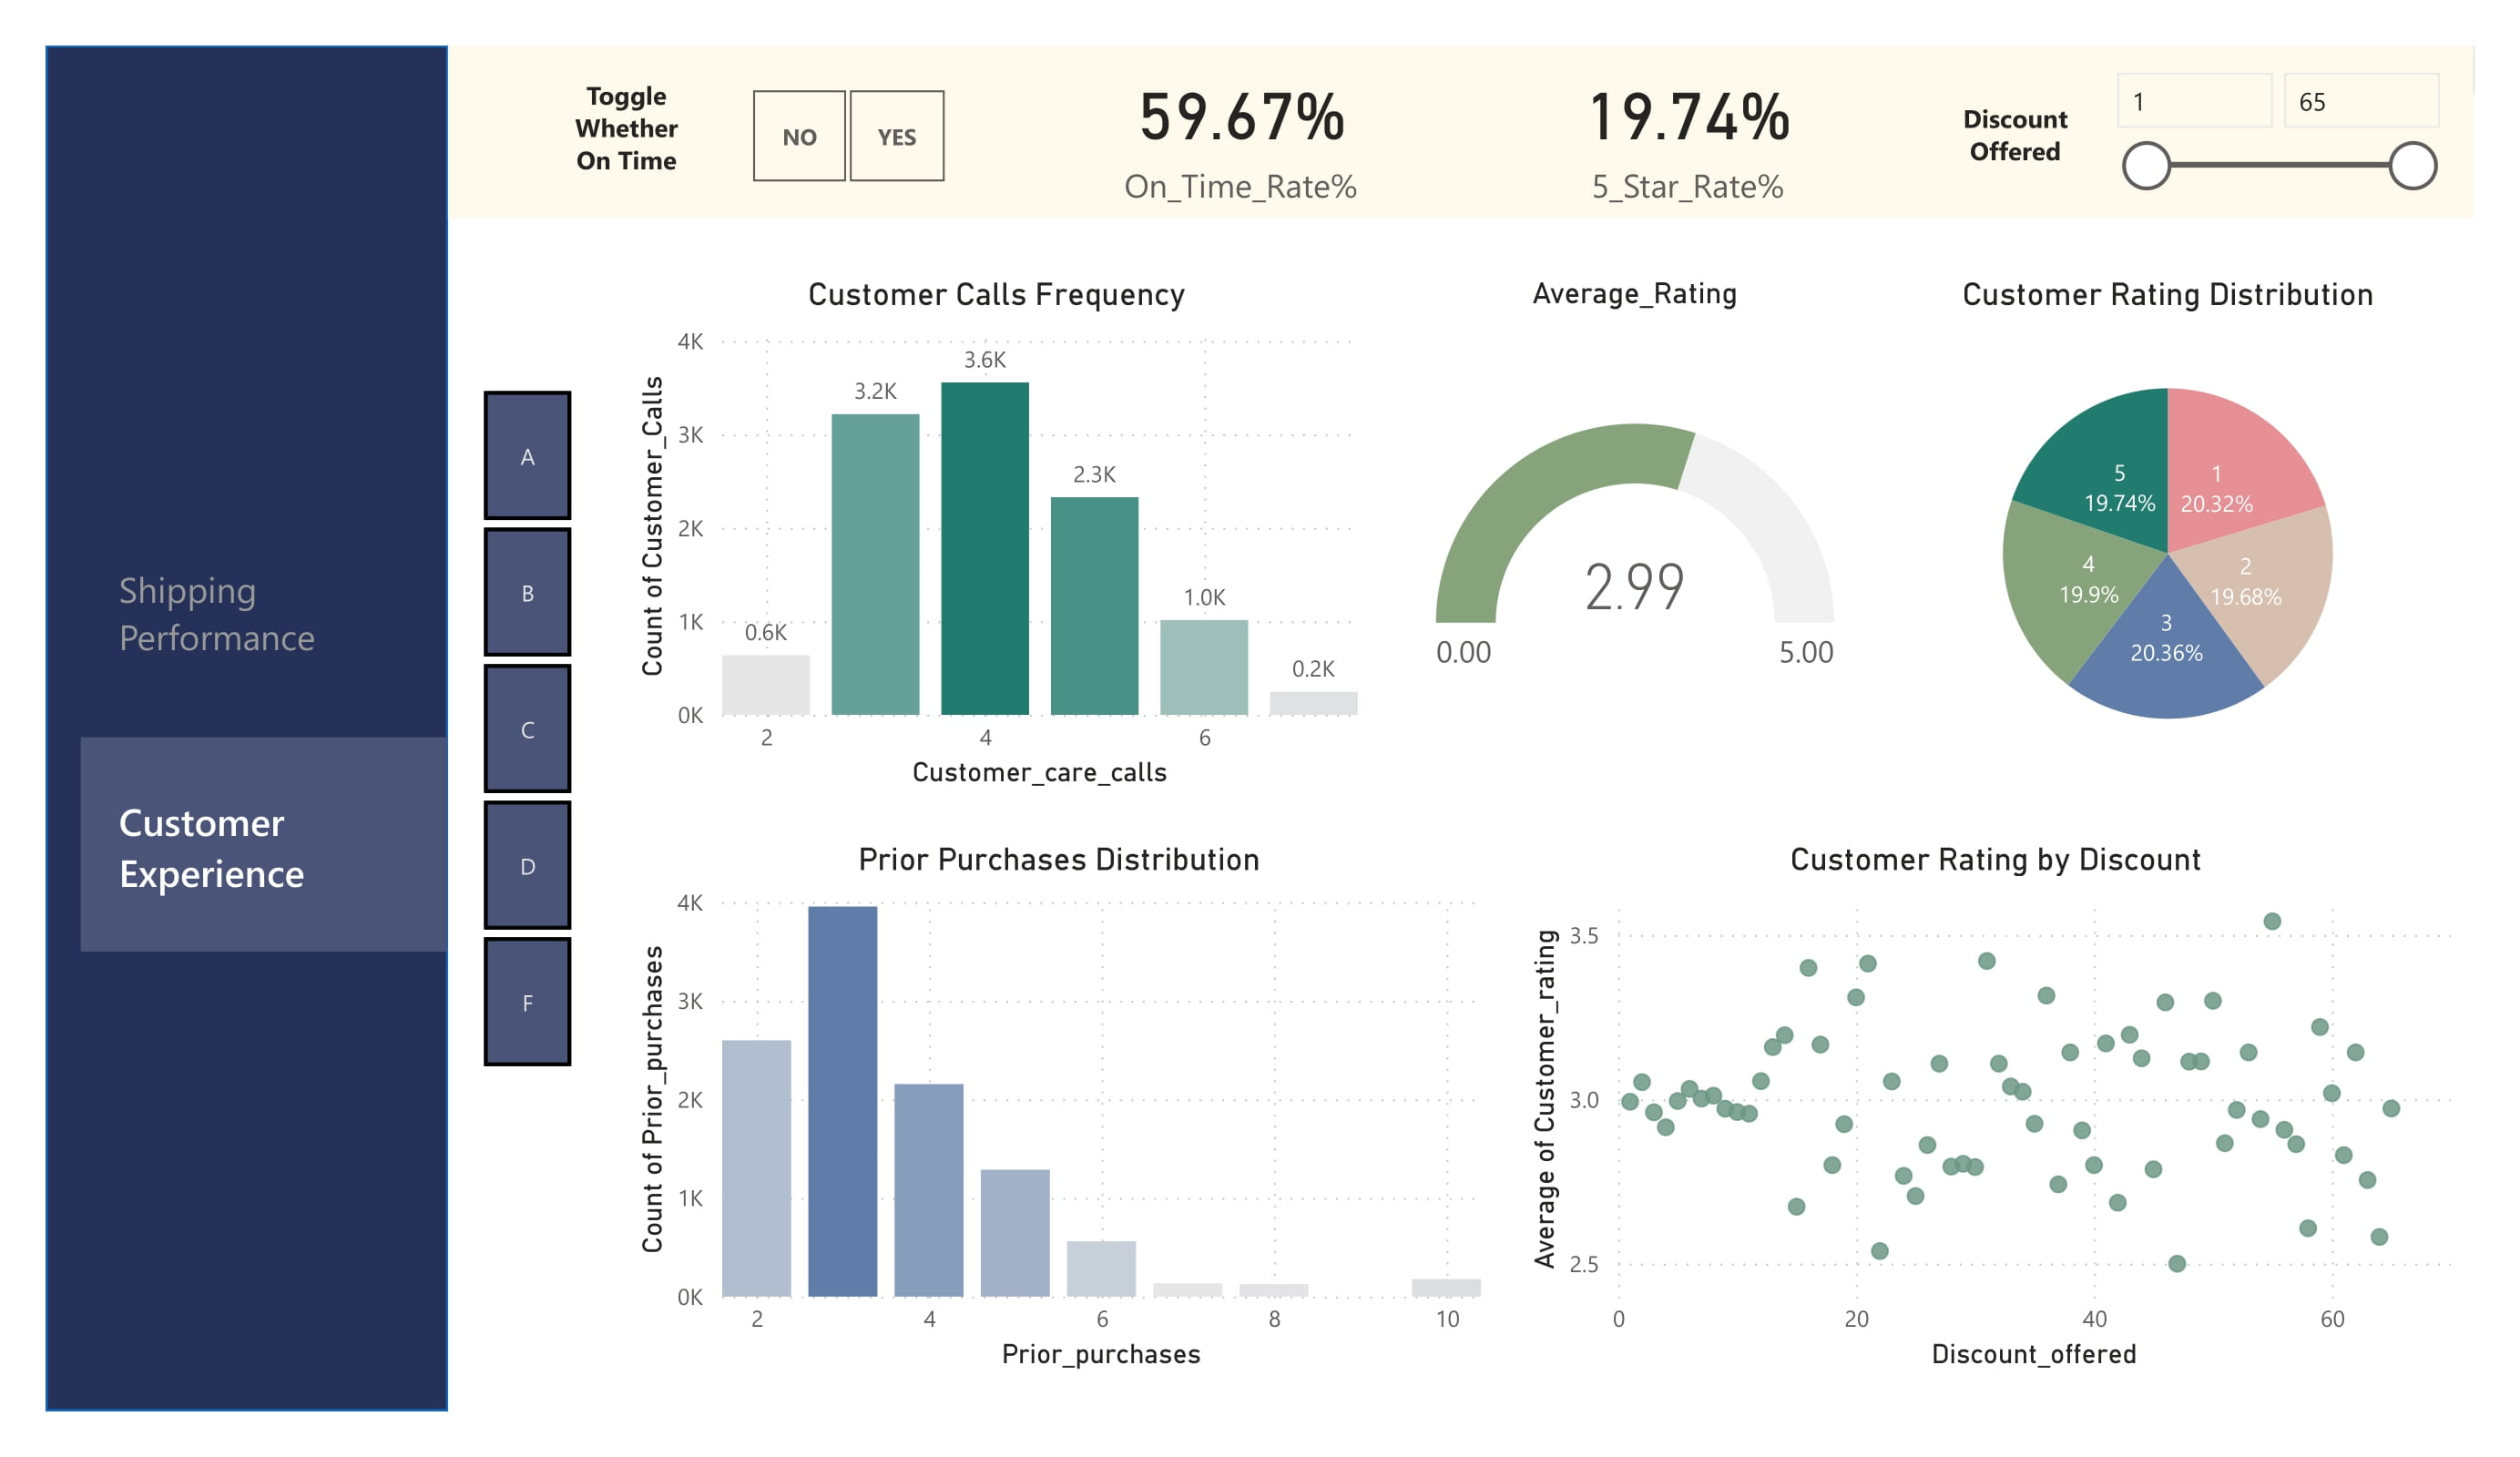

- What are the average customer ratings?
    - 2.99
- Which customer feature is related to customer ratings?
    - According to earlier analysis, none is related. However, I include some features in the dashboard to further investigate.
- Does the on time rate matter to customer ratings?
    - By clicking "YES" on the upper left, we see the average rating is 3.01, which is 0.04 higher than the rating 2.97 when clicking "NO". It seems matter, but the 0 cramer's V value we got earlier indicates that this is by chance.
- Can increasing discount offered raise customer ratings?
    - No, according to the scatterplot on lower right corner, these two variables have no pattern.
- How many customers care calls does the business usually receive?
    - Usually 3 to 5.
- Does more care call mean bad experience(bad ratings)?
    - No. By clicking each column of the customer call frequency chart, we can see that although the 2 calls column has the highest rating 3.07, the ratings doesn't necessarily decrease as the calls increase. Also, they did not pass the correlation test.
- Does high prior purchases mean good experience(good ratings)?
    - No. Other than the 10 prior purchases column, which has a higher score 3.2. Others also show no pattern.

<a id="act"></a>
# Action Suggestions

Based on the analysis, the dataset is very unreliable. To draw better conclusions, the business first needs to improve their data gathering systems. This is crucial. Otherwise the business needs to rely on third party data and just makes strategies based on the management team's experience and intuitions.